# The dataset: 
https://www.kaggle.com/datasets/mariaherrerot/aptos2019?select=test_images


In [28]:


#libraries 
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import cv2

import tensorflow as tf
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd 

from sklearn.utils import class_weight
from sklearn.model_selection import KFold, StratifiedKFold

import seaborn as sns
sns.set_theme(style="whitegrid")


In [19]:
train_path= '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/train/'
val_path= '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/val/'
test_path= '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/test/'

In [20]:
def make_dataframe(source_path):
    data = []
    for class_name in os.listdir(source_path):
        if not class_name.startswith('.'): 
            for img_path in os.listdir(os.path.join(source_path, class_name)):
                if not img_path.startswith('.'):
    #                 print(os.path.join(src_train_dir_path, class_name, img_path))
                    src_path = os.path.join(source_path, class_name, img_path)
                    filename = img_path
                    data.append({'diagnosis': class_name, 'src_path': src_path, 'filename': filename})
    dataframe = pd.DataFrame(data)
    return dataframe


In [21]:
train_dataframe = make_dataframe(train_path)
train_dataframe.shape

(2930, 3)

In [22]:
val_dataframe = make_dataframe(val_path)
val_dataframe.shape

(366, 3)

In [23]:
test_dataframe = make_dataframe(test_path)
test_dataframe.shape

(366, 3)

# EDA

In [24]:
train_dataframe['diagnosis'].value_counts()

No_DR             1434
Moderate           808
Mild               300
Proliferate_DR     234
Severe             154
Name: diagnosis, dtype: int64

In [25]:
val_dataframe['diagnosis'].value_counts()

No_DR             172
Moderate          104
Mild               40
Proliferate_DR     28
Severe             22
Name: diagnosis, dtype: int64

In [26]:
test_dataframe['diagnosis'].value_counts()

No_DR             199
Moderate           87
Proliferate_DR     33
Mild               30
Severe             17
Name: diagnosis, dtype: int64

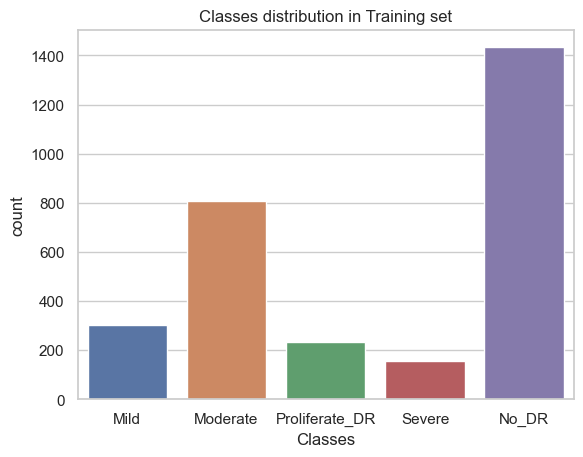

In [32]:
ax = sns.countplot(x=train_dataframe['diagnosis'])
ax.set(xlabel='Classes', ylabel='count')
plt.title('Classes distribution in Training set')
plt.show()

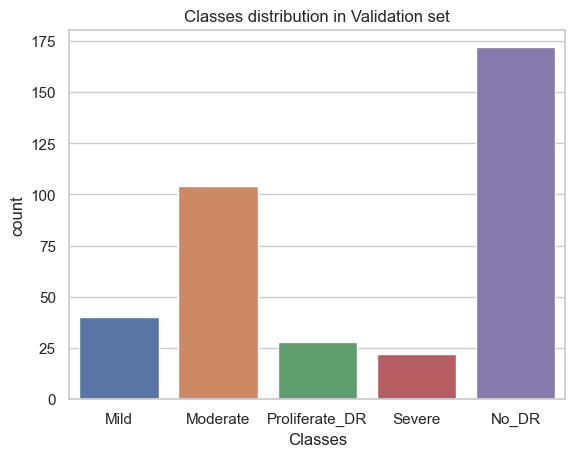

In [33]:
ax = sns.countplot(x=val_dataframe['diagnosis'])
ax.set(xlabel='Classes', ylabel='count')
plt.title('Classes distribution in Validation set')
plt.show()

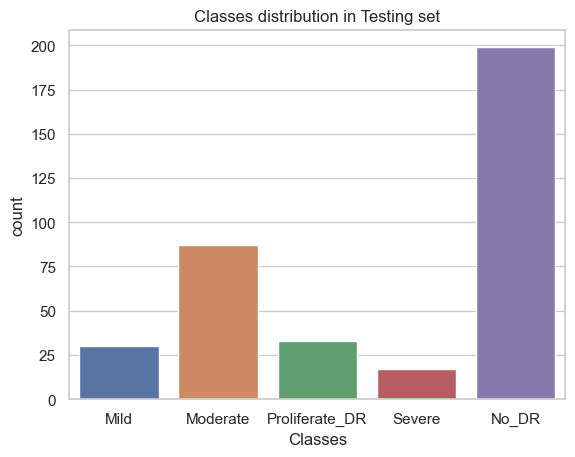

In [34]:
ax = sns.countplot(x=test_dataframe['diagnosis'])
ax.set(xlabel='Classes', ylabel='count')
plt.title('Classes distribution in Testing set')
plt.show()

In [35]:
train_dataframe.shape[0]+val_dataframe.shape[0]+test_dataframe.shape[0]

3662

In [36]:
df = pd.concat([train_dataframe, val_dataframe, test_dataframe])
df.shape

(3662, 3)

In [39]:
df['diagnosis'].value_counts()

No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: diagnosis, dtype: int64

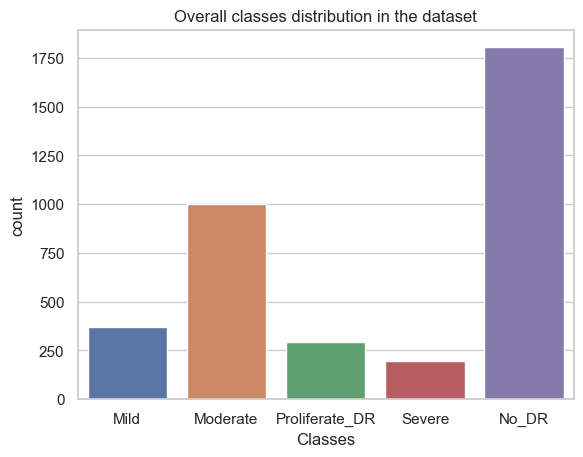

In [37]:
ax = sns.countplot(x=df['diagnosis'])
ax.set(xlabel='Classes', ylabel='count')
plt.title('Overall classes distribution in the dataset')
plt.show()

## Upsampled 5 class: EDA